## SocialStock Data Analysis

This notebook has the following objectives:

visualize the social network each day of the simulation
extract quantitative information about its evolution

In [1]:
import networkx as nx
import pandas as pd

import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = "c4r5n100"

file = open( data + "Int.txt")
tit = file.readline()

X = []
nn = {}

for l in file.readlines() :
    line = l.split(":")
    line[0:4] = [int(i) for i in line[0:4]]
    line[4] = [int(i) for i in line[4][1:-2].split(", ")]
    X.append(line[0:4])
    nn[ (line[0],line[1]) ] = line[4]

X = np.array(X)
X = pd.DataFrame(X) 

tit = tit.split("-")[:-1]
X.columns = tit
X.sort_values(["uDays" , "ind"])

X1 = X[X.uDays==1]

users = X1.shape[0]
uDays = int(X.shape[0]/users)
Deg = np.array(X1.sort_values("ind").deg)

nearest_neighbours = {}

for d in range(uDays) :
    nearest_neighbours[d+1] = {}
    for u in range(users) :
        nearest_neighbours[d+1][u] = nn[(d+1,u)]

In [4]:
#OPINION MATRIX 

file = open( data + ".txt")
tit = file.readline()

Op = []

for l in file.readlines() :
    line = (l.split(","))
    line[3] = line[3][:-2]
    line = [float(i) for i in line]
    Op.append(line)
    
O = {}

index = 0
for d in range(uDays) :
    O[d+1] = np.array(Op[index:(index + users)])
    index = index + users

#O is a dictionary with 
#key : day
#value : opinion matrix of that day 

In [5]:
##nearest_neighbours[4]

#dizionario dei nearest neighbours nel quarto giorno
#si hanno tante key-value pairs quante gli user

# key : indice dello user
# value : lista con gli inidici della callout list 

In [6]:
X_ord = X.sort_values(["uDays" , "ind"])

## Inclination Distribution

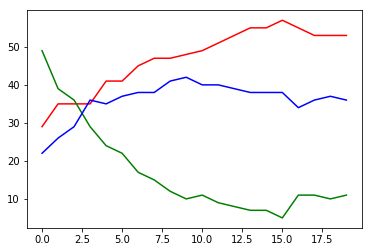

In [7]:
IncDistr = []
for d in range(uDays):
    IncDistr.append(np.unique(X[X.uDays==d+1].incl, return_counts= True)[1])
IncDistr = np.array(IncDistr)

plt.plot(IncDistr[:,0] , color = "red" )
plt.plot(IncDistr[:,1] , color = "green")
plt.plot(IncDistr[:,2] , color = "blue")

## Degree Distribution

(array([72., 18.,  0.,  2.,  0.,  4.,  3.,  0.,  0.,  1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <a list of 10 Patch objects>)

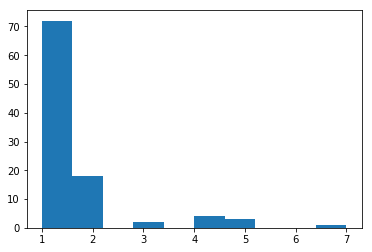

In [8]:
plt.hist(X1.deg)

## Network of Day 1

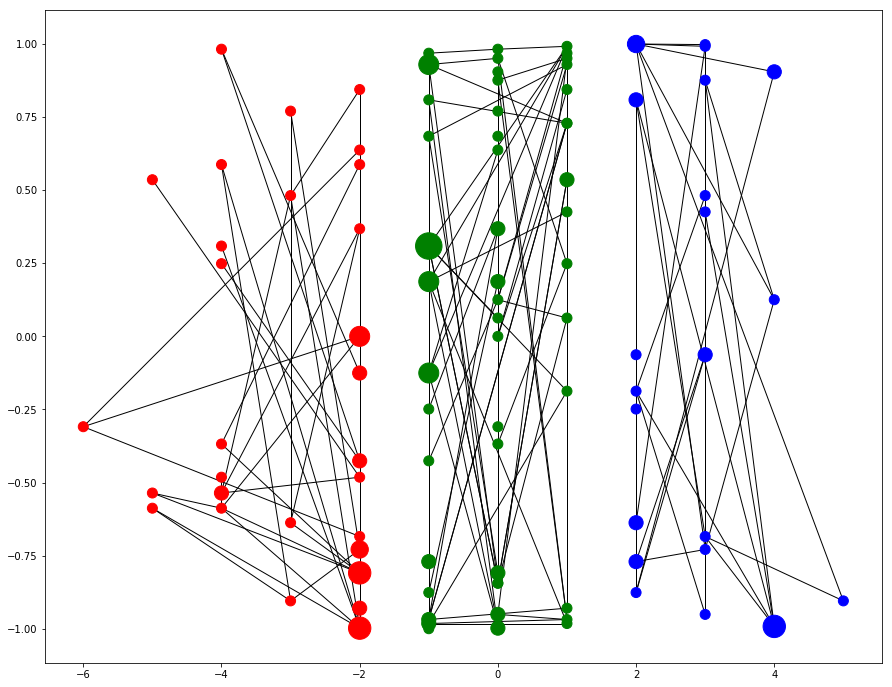

In [115]:
def Graphday(X , day) :
    G1 = nx.Graph()
    X1 = X[X.uDays == day]
    X1 = X1.sort_values(["ind"])

    for u in range(users) : 
            for n in nearest_neighbours[day][u] :
                G1.add_edge(u,n)

    pos = nx.circular_layout(G1)
    incols = np.array(["red","green","blue"])

    m = np.sum(O[day] , axis =1)
    for i in range(users) :
        pos[i][0] = m[i]

    plt.figure(1,figsize=(15,12)) 

    nx.draw_networkx(G1,
                     node_size= X1.deg*100, 
                     pos = pos,
                     node_color= incols[np.array(X1.incl)+1], 
                     with_labels=False)
    
Graphday(X,1)

In [114]:
#CREATING THE GIF 
'''
for d in range(1, uDays+1) :
    Graphday(X,d)
    title = str(d)+ ".png"
    plt.savefig(title)
    plt.close()
''' 

# Evaluating alternatives to inclination?

(array([ 1.,  3., 22., 41., 76., 62., 54., 26., 10.,  5.]),
 array([1.  , 1.38, 1.76, 2.14, 2.52, 2.9 , 3.28, 3.66, 4.04, 4.42, 4.8 ]),
 <a list of 10 Patch objects>)

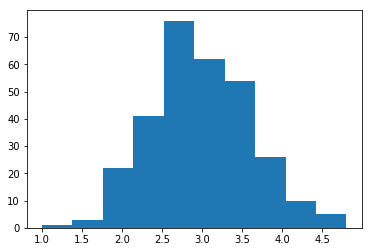

In [128]:
feO = np.random.randint(1,6, size = (300,5))
feO

feOm = np.mean(feO , axis =1)
plt.hist(feOm)

In [129]:
feOp = np.prod(feO , axis = 1)

(array([213.,  46.,  21.,   6.,   6.,   2.,   1.,   4.,   0.,   1.]),
 array([1.0000e+00, 2.5090e+02, 5.0080e+02, 7.5070e+02, 1.0006e+03,
        1.2505e+03, 1.5004e+03, 1.7503e+03, 2.0002e+03, 2.2501e+03,
        2.5000e+03]),
 <a list of 10 Patch objects>)

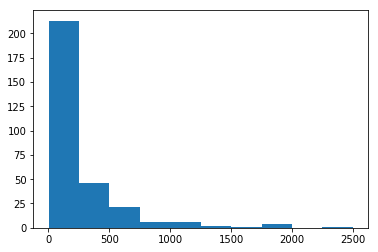

In [130]:
plt.hist(feOp)

In [133]:
feOM = np.min(feO , axis =1 )

(array([193.,   0.,   0.,  76.,   0.,   0.,  28.,   0.,   0.,   3.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <a list of 10 Patch objects>)

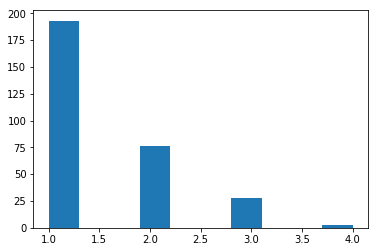

In [134]:
plt.hist(feOM)